In [325]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '231014_1836_2kPa_4line_Data'
dataname = data+'B16'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:52]
SensorData1 = SD1

In [326]:
SD1.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx66,Sx67,Sx70,Sx71,Sx72,Sx73,Force,z,theta,r
count,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.00000,104799.000000,104799.000000,104799.000000,...,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000
mean,65.428770,62.398888,51.142998,55.312937,58.382280,50.654845,58.78457,52.579195,55.368779,59.066630,...,61.565958,55.125579,56.421897,57.881861,54.388413,59.284394,69.668791,80.015496,169.994370,3.199985
std,1.845623,1.482271,0.882352,1.147658,1.351468,1.378711,1.31407,1.349781,2.096450,1.196074,...,1.475747,2.327126,1.293317,1.691494,1.431458,1.535378,33.184729,48.437346,103.757968,1.600084
min,54.900000,47.100000,43.900000,43.900000,48.900000,40.100000,47.80000,37.600000,44.900000,45.200000,...,48.300000,38.500000,41.600000,39.200000,41.800000,43.700000,-455.760000,0.000000,0.000000,0.800000
25%,64.500000,61.700000,50.600000,54.700000,57.800000,49.800000,58.20000,51.900000,54.100000,58.500000,...,61.000000,53.800000,55.900000,57.100000,53.700000,58.500000,43.880000,40.000000,80.000000,1.600000
50%,65.600000,62.600000,51.200000,55.300000,58.500000,50.700000,58.90000,52.700000,55.400000,59.100000,...,61.700000,54.900000,56.500000,58.100000,54.500000,59.400000,68.510000,80.000000,180.000000,3.200000
75%,66.600000,63.300000,51.700000,56.000000,59.200000,51.500000,59.60000,53.400000,56.700000,59.700000,...,62.400000,56.100000,57.200000,59.000000,55.300000,60.300000,95.150000,120.000000,260.000000,4.800000
max,71.200000,67.000000,54.600000,60.700000,62.800000,57.100000,62.90000,57.300000,63.800000,65.500000,...,65.800000,70.900000,60.900000,63.000000,59.400000,64.200000,167.450000,160.000000,340.000000,5.600000


In [327]:
SDreal = SD1
#SDreal["z"] *= 2

In [328]:
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx66,Sx67,Sx70,Sx71,Sx72,Sx73,Force,z,theta,r
count,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.00000,104799.000000,104799.000000,104799.000000,...,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000,104799.000000
mean,65.428770,62.398888,51.142998,55.312937,58.382280,50.654845,58.78457,52.579195,55.368779,59.066630,...,61.565958,55.125579,56.421897,57.881861,54.388413,59.284394,69.668791,80.015496,169.994370,3.199985
std,1.845623,1.482271,0.882352,1.147658,1.351468,1.378711,1.31407,1.349781,2.096450,1.196074,...,1.475747,2.327126,1.293317,1.691494,1.431458,1.535378,33.184729,48.437346,103.757968,1.600084
min,54.900000,47.100000,43.900000,43.900000,48.900000,40.100000,47.80000,37.600000,44.900000,45.200000,...,48.300000,38.500000,41.600000,39.200000,41.800000,43.700000,-455.760000,0.000000,0.000000,0.800000
25%,64.500000,61.700000,50.600000,54.700000,57.800000,49.800000,58.20000,51.900000,54.100000,58.500000,...,61.000000,53.800000,55.900000,57.100000,53.700000,58.500000,43.880000,40.000000,80.000000,1.600000
50%,65.600000,62.600000,51.200000,55.300000,58.500000,50.700000,58.90000,52.700000,55.400000,59.100000,...,61.700000,54.900000,56.500000,58.100000,54.500000,59.400000,68.510000,80.000000,180.000000,3.200000
75%,66.600000,63.300000,51.700000,56.000000,59.200000,51.500000,59.60000,53.400000,56.700000,59.700000,...,62.400000,56.100000,57.200000,59.000000,55.300000,60.300000,95.150000,120.000000,260.000000,4.800000
max,71.200000,67.000000,54.600000,60.700000,62.800000,57.100000,62.90000,57.300000,63.800000,65.500000,...,65.800000,70.900000,60.900000,63.000000,59.400000,64.200000,167.450000,160.000000,340.000000,5.600000


In [329]:
# SDreal 값이 999이거나 100이상인 이상치 제거
SDreal = SDreal[~(SDreal == 999).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 'Force', 'theta', 'z', 'r' 열을 제외한 열에서 100 이상의 값을 제거
cols_to_exclude = ["Force", "theta", "z", "r"]
cols_to_check = [col for col in SDreal.columns if col not in cols_to_exclude]

SDreal = SDreal[~((SDreal <= 0) & (SDreal.columns == "Force")).any(axis=1)]

SDreal = SDreal[SDreal["r"] >= 0.8*1]
SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx70,Sx71,Sx72,Sx73,Force,z,theta,r,cos,sin
count,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,...,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,104781.000000,1.047810e+05
mean,65.428911,62.398938,51.143045,55.312966,58.382399,50.654823,58.784588,52.579167,55.368745,59.066630,...,56.421916,57.881896,54.388481,59.284410,69.759053,80.016950,170.001241,3.199931,-0.000065,-1.590479e-05
std,1.845520,1.482308,0.882353,1.147664,1.351365,1.378770,1.314045,1.349790,2.096372,1.196064,...,1.293400,1.691552,1.431496,1.535443,32.465069,48.436518,103.758777,1.600113,0.707140,7.070808e-01
min,54.900000,47.100000,43.900000,43.900000,48.900000,40.100000,47.800000,37.600000,44.900000,45.200000,...,41.600000,39.200000,41.800000,43.700000,15.920000,0.000000,0.000000,0.800000,-1.000000,-9.848078e-01
25%,64.500000,61.700000,50.600000,54.700000,57.800000,49.800000,58.200000,51.900000,54.100000,58.500000,...,55.900000,57.100000,53.700000,58.500000,43.890000,40.000000,80.000000,1.600000,-0.766044,-6.427876e-01
50%,65.600000,62.600000,51.200000,55.300000,58.500000,50.700000,58.900000,52.700000,55.400000,59.100000,...,56.500000,58.100000,54.500000,59.400000,68.510000,80.000000,180.000000,3.200000,-0.173648,1.224647e-16
75%,66.600000,63.300000,51.700000,56.000000,59.200000,51.500000,59.600000,53.400000,56.700000,59.700000,...,57.200000,59.000000,55.300000,60.300000,95.150000,120.000000,260.000000,4.800000,0.766044,6.427876e-01
max,71.200000,67.000000,54.600000,60.700000,62.800000,57.100000,62.900000,57.300000,63.800000,65.500000,...,60.900000,63.000000,59.400000,64.200000,167.450000,160.000000,340.000000,5.600000,1.000000,9.848078e-01


In [330]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns

    for column in columns:
        df[column] = transformation(df[column])
    
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def standardize(column):
    return (column - column.mean()) / column.std()

def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1



SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], submean)

#SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], submean)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], standardize)

SDreal

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx70,Sx71,Sx72,Sx73,Force,z,theta,r,cos,sin
0,60.8,59.7,51.8,55.7,57.0,49.5,58.3,52.8,56.1,60.2,...,56.0,58.5,54.2,59.7,-0.976638,-1.0,0,-1.0,1.000000,0.00000
1,61.3,59.6,52.0,56.1,57.3,49.2,58.1,52.7,55.6,60.2,...,55.8,58.7,53.3,59.4,-0.976638,-1.0,0,-1.0,1.000000,0.00000
2,61.5,60.0,51.4,56.3,57.3,49.7,58.4,52.3,55.6,60.3,...,55.7,59.0,53.1,59.6,-0.976374,-1.0,0,-1.0,1.000000,0.00000
3,61.3,59.5,51.5,56.4,57.4,49.8,58.6,52.7,56.0,60.3,...,56.1,59.0,53.1,59.3,-0.976110,-1.0,0,-1.0,1.000000,0.00000
4,62.0,59.8,51.4,57.0,57.3,49.8,58.9,52.1,56.7,60.2,...,55.9,58.6,52.8,58.8,-0.976770,-1.0,0,-1.0,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104794,64.0,62.4,52.1,54.7,55.9,49.6,58.2,52.1,52.6,60.4,...,57.2,57.7,53.8,58.3,-0.925163,1.0,340,1.0,0.939693,-0.34202
104795,63.8,62.2,51.6,55.0,56.1,49.5,57.9,51.9,52.4,60.3,...,57.5,57.9,53.5,58.7,-0.925427,1.0,340,1.0,0.939693,-0.34202
104796,63.9,62.0,51.2,55.1,56.2,49.6,57.9,51.9,52.8,59.9,...,57.4,58.1,54.2,58.8,-0.924899,1.0,340,1.0,0.939693,-0.34202
104797,63.7,62.2,50.8,55.3,56.2,49.7,58.1,51.3,53.2,59.8,...,57.8,58.6,53.7,59.3,-0.925295,1.0,340,1.0,0.939693,-0.34202


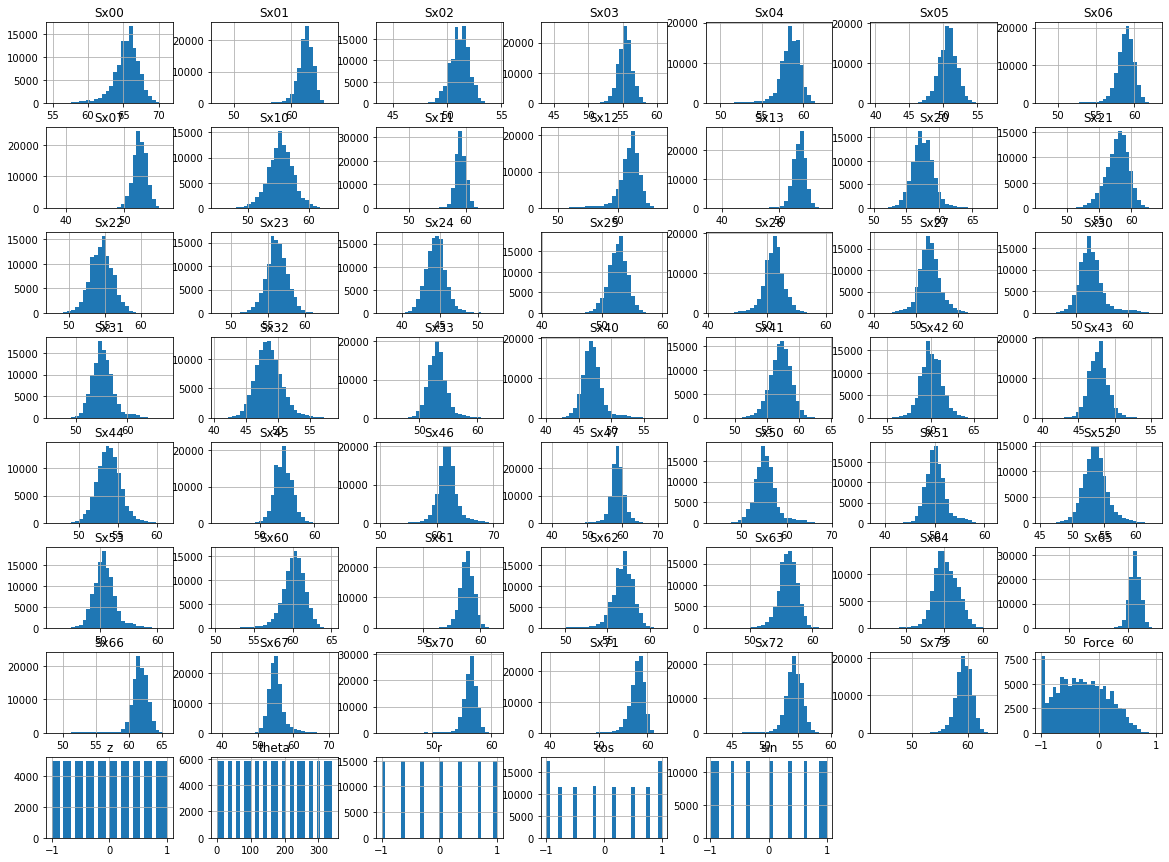

In [331]:
%matplotlib inline
import matplotlib.pyplot as plt
SDreal.hist(bins=30, figsize=(20,15))
plt.show()

In [332]:
SDy = SDreal.iloc[:,48:54]
SDy.describe()

,Force,z,theta,r,cos,sin
count,104781.000000,104781.000000,104781.000000,1.047810e+05,104781.000000,1.047810e+05
mean,-0.289394,0.000212,170.001241,-2.863114e-05,-0.000065,-1.590479e-05
std,0.428497,0.605456,103.758777,6.667136e-01,0.707140,7.070808e-01
min,-1.000000,-1.000000,0.000000,-1.000000e+00,-1.000000,-9.848078e-01
25%,-0.630832,-0.500000,80.000000,-6.666667e-01,-0.766044,-6.427876e-01
50%,-0.305880,0.000000,180.000000,2.220446e-16,-0.173648,1.224647e-16
75%,0.045734,0.500000,260.000000,6.666667e-01,0.766044,6.427876e-01
max,1.000000,1.000000,340.000000,1.000000e+00,1.000000,9.848078e-01


In [333]:
X = SDreal.iloc[:,0:48]
y = SDreal.iloc[:,[48,49,52,53]]

In [334]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx62,Sx63,Sx64,Sx65,Sx66,Sx67,Sx70,Sx71,Sx72,Sx73
0,60.8,59.7,51.8,55.7,57.0,49.5,58.3,52.8,56.1,60.2,...,55.2,56.2,50.9,59.2,62.9,55.3,56.0,58.5,54.2,59.7
1,61.3,59.6,52.0,56.1,57.3,49.2,58.1,52.7,55.6,60.2,...,55.0,56.0,50.9,59.3,63.6,55.2,55.8,58.7,53.3,59.4
2,61.5,60.0,51.4,56.3,57.3,49.7,58.4,52.3,55.6,60.3,...,55.0,55.7,50.5,58.6,62.9,54.9,55.7,59.0,53.1,59.6
3,61.3,59.5,51.5,56.4,57.4,49.8,58.6,52.7,56.0,60.3,...,55.3,55.7,50.9,59.0,62.9,54.9,56.1,59.0,53.1,59.3
4,62.0,59.8,51.4,57.0,57.3,49.8,58.9,52.1,56.7,60.2,...,55.4,56.1,51.1,58.5,62.6,55.1,55.9,58.6,52.8,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104794,64.0,62.4,52.1,54.7,55.9,49.6,58.2,52.1,52.6,60.4,...,57.5,57.3,57.9,62.0,60.9,53.2,57.2,57.7,53.8,58.3
104795,63.8,62.2,51.6,55.0,56.1,49.5,57.9,51.9,52.4,60.3,...,57.6,57.6,57.6,62.0,61.2,53.3,57.5,57.9,53.5,58.7
104796,63.9,62.0,51.2,55.1,56.2,49.6,57.9,51.9,52.8,59.9,...,57.6,57.8,57.3,61.5,61.2,53.3,57.4,58.1,54.2,58.8
104797,63.7,62.2,50.8,55.3,56.2,49.7,58.1,51.3,53.2,59.8,...,57.0,57.4,57.6,61.1,61.2,53.6,57.8,58.6,53.7,59.3


In [335]:
y

,Force,z,cos,sin
0,-0.976638,-1.0,1.000000,0.00000
1,-0.976638,-1.0,1.000000,0.00000
2,-0.976374,-1.0,1.000000,0.00000
3,-0.976110,-1.0,1.000000,0.00000
4,-0.976770,-1.0,1.000000,0.00000
...,...,...,...,...
104794,-0.925163,1.0,0.939693,-0.34202
104795,-0.925427,1.0,0.939693,-0.34202
104796,-0.924899,1.0,0.939693,-0.34202
104797,-0.925295,1.0,0.939693,-0.34202


In [336]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [337]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  62868 ea 59 %    X_valid:  20956 ea 19 %    X_test:  20957 ea 20 %


In [338]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [339]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/231014_1836_2kPa_4line_DataB16_SS.pkl']

In [340]:
from tensorflow import keras
model = keras.models.Sequential([  
    keras.layers.Dense(320, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),            
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                                                    
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                                                    
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                                                
    keras.layers.Dense(4)    
    
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 320)               15680     
                                                                 
 dense_51 (Dense)            (None, 128)               41088     
                                                                 
 dense_52 (Dense)            (None, 32)                4128      
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 4)                 132       
                                                                 
Total params: 62,084
Trainable params: 62,084
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [341]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'231006_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [342]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [343]:
dataname

'231014_1836_2kPa_4line_DataB16'

In [344]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 8
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
1965/1965 [==============================] - 8s 4ms/step - loss: 0.1055 - val_loss: 0.0697
Epoch 2/300
1965/1965 [==============================] - 7s 3ms/step - loss: 0.0460 - val_loss: 0.0410
Epoch 3/300
1965/1965 [==============================] - 7s 3ms/step - loss: 0.0341 - val_loss: 0.0372
Epoch 4/300
1965/1965 [==============================] - 7s 3ms/step - loss: 0.0284 - val_loss: 0.0331
Epoch 5/300
1965/1965 [==============================] - 7s 4ms/step - loss: 0.0250 - val_loss: 0.0263
Epoch 6/300
1965/1965 [==============================] - 7s 4ms/step - loss: 0.0229 - val_loss: 0.0248
Epoch 7/300
1965/1965 [==============================] - 7s 4ms/step - loss: 0.0217 - val_loss: 0.0234
Epoch 8/300
1965/1965 [==============================] - 7s 4ms/step - loss: 0.0201 - val_loss: 0.0226
Epoch 9/300
1965/1965 [==============================] - 7s 3ms/step - loss: 0.0190 - val_loss: 0.0256
Epoch 10/300
1965/1965 [==============================] - 7s 4ms/step - l

In [345]:
# %load_ext tensorboard
# %tensorboard --logdir=./mylog/230320_Data --port=2322

In [346]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [347]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df

655/655 [==============================] - 1s 2ms/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
0,-0.676689,-0.011084,-0.845304,-0.618958,-0.798818
1,-0.286847,0.488579,-0.781204,0.655338,0.777818
2,-0.392888,-0.681240,0.948948,0.132364,0.044115
3,-0.375607,-0.382170,0.247088,1.003346,0.423141
4,-0.964796,-0.922633,-0.134701,-0.997604,-0.542721
...,...,...,...,...,...
20951,-0.233037,-0.620182,-0.177067,-0.954599,-0.558379
20952,-0.437048,0.222288,1.010439,-0.003969,-0.001250
20953,0.063103,-0.704527,0.070245,0.961523,0.476787
20954,-0.384912,-0.654873,0.804408,-0.456961,-0.164443


In [348]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df

,force,z,cos,sin,theta
0,-0.610902,-0.1,-0.766044,-0.642788,-0.777778
1,-0.193955,0.6,-0.766044,0.642788,0.777778
2,-0.445786,-0.6,1.000000,0.000000,0.000000
3,-0.354715,-0.3,0.173648,0.984808,0.444444
4,-0.928859,-0.9,-0.173648,-0.984808,-0.555556
...,...,...,...,...,...
20951,-0.136673,-0.5,-0.173648,-0.984808,-0.555556
20952,-0.180492,0.2,1.000000,0.000000,0.000000
20953,0.029763,-0.7,0.173648,0.984808,0.444444
20954,-0.464265,-0.7,0.766044,-0.642788,-0.222222


In [349]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)

# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
93.56% force
98.17% z
98.16% cos
97.75% sin
77.35% theta


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
force,0.935637,0.02865,0.183619,0.136852,0.115913
z,0.050238,0.981677,0.005052,-0.006954,-0.000939
cos,0.207891,0.024842,0.981552,0.08089,0.046771
sin,0.114918,-0.020507,-0.006327,0.97747,0.76651
theta,0.032642,-0.02553,-0.14357,0.748685,0.773529


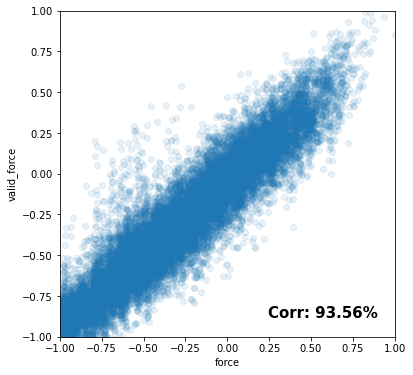

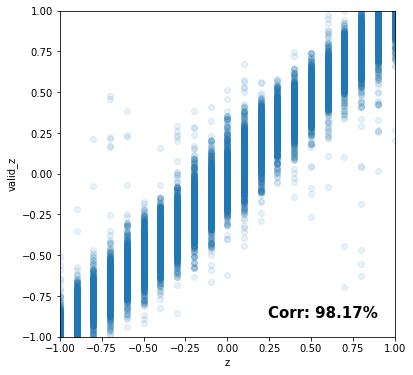

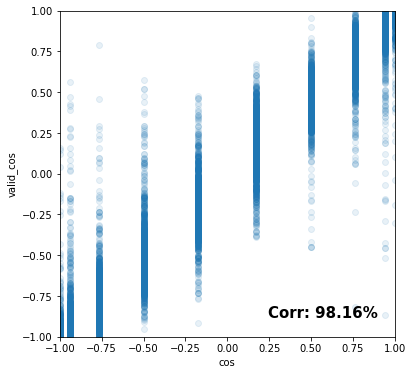

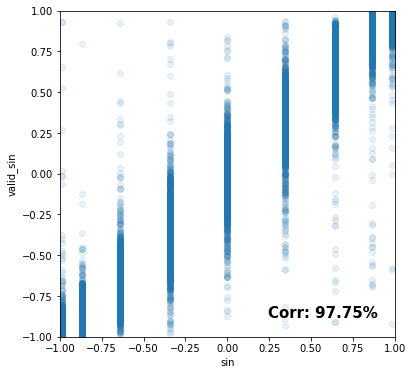

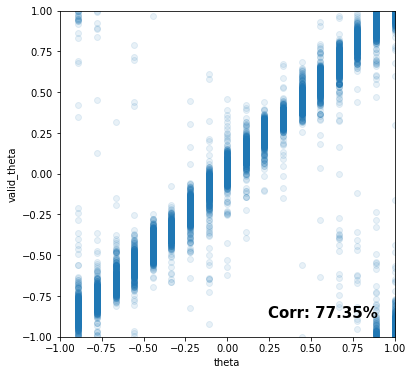

In [350]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig/4line"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta']
#fields = ['force','z','r','cos','sin','theta']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


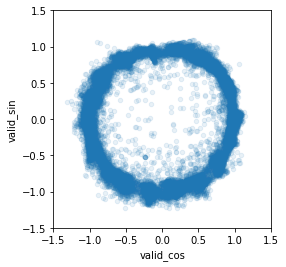

In [351]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

# Display the plot
plt.show()

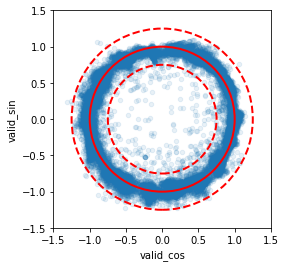

In [352]:
alpha = 0.1  # set alpha value for scatter plot
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# Draw a circle with center at (0, 0) and radius 1
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# Draw offset circles (one inside and one outside the main circle)
offset = 0.25  # adjust the offset value as needed
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
# Display the plot
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_offset.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()


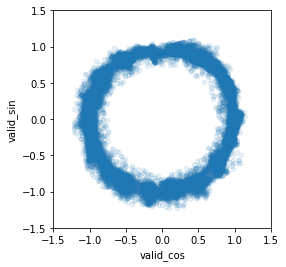

1.359992364955144

In [353]:
ValidPre_filtered = ValidPre[
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 <= (1 + offset)**2) &
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 >= (1 - offset)**2)
]


ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()

total_data_count = len(ValidPre)
filtered_data_count = len(ValidPre_filtered)
percentage_filtered_out = ((total_data_count - filtered_data_count) / total_data_count) * 100
percentage_filtered_out

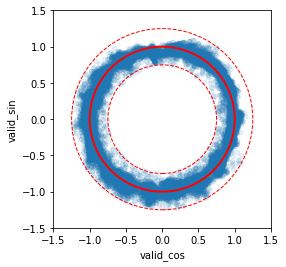

In [354]:
# 기존의 scatter plot을 그립니다.
ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# 중심이 (0, 0)이고 반지름이 1인 실선 원을 추가합니다.
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# 점선 원을 추가합니다. 하나는 내부에, 하나는 외부에 위치합니다.
offset = 0.25  # offset 값을 필요에 따라 조정합니다.
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=1)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=1)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# 그래프의 비율을 1:1로 설정합니다.
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정

# 그래프를 파일로 저장합니다.
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut_offset.png"))

# 그래프를 출력합니다.
plt.show()
